In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import warnings
warnings.filterwarnings('ignore')

In [36]:
! pip install imblearn

# 1. Tiền xử lý dữ liệu

In [ ]:
project_url = '../../../../source/DU_AN_CNTT_2/'
project_url = glob.glob(project_url)[0]
path = os.path.join(project_url, 'Data/d6/diabetes_012_health_indicators_BRFSS2021_cleaned.csv')
df = pd.read_csv(path)
df

,Class,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,HighBPAndChol,HighBMI,CharacteristicIndex
0,0,0.077867,0.086008,0.085026,0.081567,0.084096,0.073687,0.090083,0.087595,0.088290,0.138658,0.087094,0.089331,0.087265,0.082985,1,0.029257,17.0
1,2,0.091655,0.086008,0.085026,0.081567,0.084992,0.088438,0.090083,0.087595,0.088290,0.138658,0.087094,0.089331,0.083631,0.085960,3,0.240170,14.0
2,2,0.091655,0.086008,0.085026,0.081567,0.084096,0.088438,0.090083,0.087595,0.088290,0.095662,0.087094,0.058544,0.083631,0.082985,1,0.050406,14.0
3,2,0.077867,0.086008,0.085026,0.081567,0.084992,0.088438,0.090083,0.087595,0.088290,0.138658,0.087094,0.089331,0.083631,0.085960,1,0.240170,13.0
4,0,0.091655,0.086008,0.085026,0.086135,0.084992,0.088438,0.090083,0.087595,0.088290,0.095662,0.087094,0.089331,0.083631,0.082985,1,0.050406,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23214,0,0.077867,0.086008,0.085026,0.081567,0.084992,0.088438,0.090083,0.087595,0.088290,0.138658,0.087094,0.089331,0.087265,0.082985,0,0.029257,17.0
23215,2,0.091655,0.086008,0.085026,0.086135,0.084096,0.088438,0.036215,0.087595,0.061831,0.095662,0.065741,0.058544,0.083631,0.085960,1,0.216812,11.0
23216,0,0.077867,0.086008,0.085026,0.086135,0.084096,0.073687,0.090083,0.053524,0.061831,0.000000,0.087094,0.089331,0.083631,0.085960,0,0.029257,7.0
23217,1,0.091655,0.086008,0.085026,0.086135,0.084096,0.073687,0.090083,0.087595,0.088290,0.095662,0.087094,0.089331,0.083631,0.085960,1,0.216812,7.0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23219 entries, 0 to 23218
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Class                 23219 non-null  int64  
 1   Smoker                23219 non-null  float64
 2   Stroke                23219 non-null  float64
 3   HeartDiseaseorAttack  23219 non-null  float64
 4   PhysActivity          23219 non-null  float64
 5   Fruits                23219 non-null  float64
 6   Veggies               23219 non-null  float64
 7   HvyAlcoholConsump     23219 non-null  float64
 8   AnyHealthcare         23219 non-null  float64
 9   NoDocbcCost           23219 non-null  float64
 10  GenHlth               23219 non-null  float64
 11  MentHlth              23219 non-null  float64
 12  PhysHlth              23219 non-null  float64
 13  DiffWalk              23219 non-null  float64
 14  Sex                   23219 non-null  float64
 15  HighBPAndChol      

## 1.1 Train Test split và normalize

### 1.1.1 Train Test Split

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X, y = df.drop(columns=['Class']), df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train.value_counts().sort_index()

Class
0    11116
1     1916
2     5543
Name: count, dtype: int64

### 1.1.2. Normalize

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)
y_train.value_counts().sort_index()

Class
0    11116
1     1916
2     5543
Name: count, dtype: int64

### 1.1.3. Kết quả và lưu tập dữ liệu trước cân bằng

In [43]:
origin = np.concatenate((y_train.values.reshape(-1,1), X_train,), axis=1)
origin = pd.DataFrame(origin, columns=df.columns)
# origin = origin.sample(frac = 0.8, random_state = 42)
path = os.path.join(project_url, f'Data/d6/Balanced Data/origin.csv')
origin.to_csv(path, index=False)

In [44]:
train = np.concatenate((y_train.values.reshape(-1,1), X_train,), axis=1)
train = pd.DataFrame(train, columns=df.columns)
train.value_counts('Class').sort_index()

Class
0.0    11116
1.0     1916
2.0     5543
Name: count, dtype: int64

## 1.2 Can Bang

In [45]:
def get_ordinal_columns(data):
    ordinal_columns = []
    for col in data.columns:
        if data[col].value_counts().index.size > 2:
            ordinal_columns.append(col)
    return ordinal_columns

In [46]:
# nominal_columns = ['Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'Sex']
# categorical_columns = ['HighBloodPressure', 'HighBMI', 'StrokeAndHeartDisease', 'HlthCare', 'CharacteristicIndex', 'GenHlth',	'MentHlth',	'PhysHlth']
# categorical_columns = ['Smoker', 'PhysActivity', 'Fruits',
#                        'Veggies', 'HvyAlcoholConsump', 'HighBMI',
#                        'Sex', 'HlthCare',
#                        'GenHlth',	'MentHlth',	'PhysHlth']
categorical_columns = [i for i in df.select_dtypes(include=['float64']).columns.tolist() if i != 'CharacteristicIndex']
categorical_columns

['Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Sex',
 'HighBMI']

### Balance

In [47]:
X_train, y_train = train.drop('Class', axis=1), train['Class']
y_train.value_counts().sort_index()

Class
0.0    11116
1.0     1916
2.0     5543
Name: count, dtype: int64

In [48]:
from imblearn.over_sampling import SMOTE, SMOTENC, KMeansSMOTE, ADASYN
from imblearn.under_sampling import TomekLinks, EditedNearestNeighbours, NearMiss
from imblearn.combine import SMOTEENN, SMOTETomek

In [49]:
ncols = [i-1 for (i,j) in enumerate(df.columns) if j in categorical_columns]
ncols

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15]

In [50]:
methods = [
    SMOTE(sampling_strategy='not majority',k_neighbors=3, random_state=42),
    SMOTENC(sampling_strategy='all', categorical_features=ncols, k_neighbors=3, random_state=42),
    ADASYN(sampling_strategy='auto', random_state = 42, n_neighbors=3),
    NearMiss(sampling_strategy='not minority', n_neighbors=2),
    TomekLinks(sampling_strategy='auto'),
    EditedNearestNeighbours(sampling_strategy= 'not minority'),
    SMOTEENN(
        smote = SMOTE(
            sampling_strategy='all',
            k_neighbors=3),
        enn = EditedNearestNeighbours(sampling_strategy= 'all')
                          ),
    SMOTETomek(
        smote = SMOTE(
            sampling_strategy='not majority',
            k_neighbors=3,
            random_state=42
            ),
        tomek = TomekLinks(sampling_strategy='auto')
                          )
]

In [51]:
samples = []
names = ['SMOTE', 'SMOTENC', 'ADASYN', 'NearMiss', 'TomekLinks', 'ENN', 'SMOTEENN', 'SMOTETomek']
c = 0
# beta = 0.3
for method in methods:
    # if names[c] == 'NearMiss':
    #     X_train_02 = X_train.loc[y_train!=1].copy()
    #     y_train_02 = y_train.loc[y_train!=1].copy()
    #     X_train_resample, y_train_resample = method.fit_resample(X_train_02, y_train_02)
    #     X_train_resample = pd.concat([X_train_resample, X_train.loc[y_train==1]])
    #     y_train_resample = pd.concat([y_train_resample, y_train.loc[y_train==1]])
    # else:
    X_train_resample, y_train_resample = method.fit_resample(X_train, y_train)
    sample = np.concatenate((y_train_resample.values.reshape(-1,1), X_train_resample,), axis=1)
    sample = pd.DataFrame(sample, columns=df.columns)
    # sample = sample.sample(frac = 0.8, random_state = 42)
    print(sample.value_counts('Class').sort_index().to_list())
    samples.append(sample)
    print(f'Resampling dataset by {names[c]} done.')
    c += 1

[11116, 11116, 11116]
Resampling dataset by SMOTE done.
[11116, 11116, 11116]
Resampling dataset by SMOTENC done.
[11116, 10743, 10618]
Resampling dataset by ADASYN done.
[1916, 1916, 1916]
Resampling dataset by NearMiss done.
[10919, 1916, 5021]
Resampling dataset by TomekLinks done.
[9358, 1916, 3117]
Resampling dataset by ENN done.
[9094, 7842, 8361]
Resampling dataset by SMOTEENN done.
[11116, 10793, 10821]
Resampling dataset by SMOTETomek done.


In [52]:
# Lưu các mẫu dữ liệu đã được cân bằng
c = 0
for sample in samples:
    path = os.path.join(project_url, f'Data/d6/Balanced Data/{names[c]}.csv')
    sample.to_csv(path, index=False)
    c += 1
    print(f'Saved {names[c-1]}.')

Saved SMOTE.
Saved SMOTENC.
Saved ADASYN.
Saved NearMiss.
Saved TomekLinks.
Saved ENN.
Saved SMOTEENN.
Saved SMOTETomek.


In [53]:
test = np.concatenate((y_test.values.reshape(-1,1), X_test,), axis=1)
test = pd.DataFrame(test, columns=df.columns)
path = os.path.join(project_url, f'Data/d6/test.csv')
test.to_csv(path, index=False)

# 2. Test

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score, roc_auc_score, accuracy_score, confusion_matrix

## 2.1 Tập trước cân bằng

In [55]:
X_origin, y_origin = origin.drop('Class', axis=1), origin['Class']
y_origin.value_counts().sort_index()

Class
0.0    11116
1.0     1916
2.0     5543
Name: count, dtype: int64

In [56]:
rf = RandomForestClassifier(
        n_estimators=100,
        criterion='entropy',
        class_weight='balanced',
        max_depth=10,
        min_samples_leaf=3,
        random_state=42,
        max_features=17
    )
rf.fit(X_origin, y_origin)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, max_features=17, min_samples_leaf=3,
                       random_state=42)

In [57]:
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)

In [58]:
precision_score(y_test, y_pred, average = None)

array([0.94049248, 0.48971963, 0.89704641])

In [59]:
recall_score(y_test, y_pred, average = None)

array([1.        , 0.54811715, 0.75070621])

In [60]:
f1_score(y_test, y_pred, average = None)

array([0.9693338 , 0.51727542, 0.81737793])

In [61]:
roc_auc_score(y_test, y_prob, multi_class='ovr', average=None)

array([0.98398666, 0.87615048, 0.96862355])

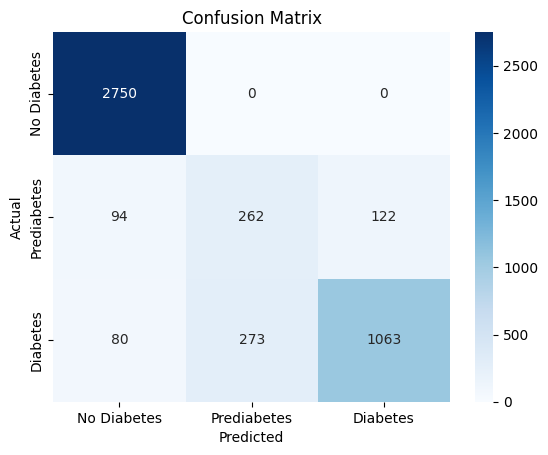

In [62]:
sns.heatmap(confusion_matrix(y_test, y_pred), xticklabels=['No Diabetes', "Prediabetes", 'Diabetes'],
            yticklabels=['No Diabetes', "Prediabetes", 'Diabetes'],
            annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 2.2. SMOTE-NC

In [63]:
X_train_resample, y_train_resample = samples[1].drop('Class', axis=1), samples[1]['Class']
y_train_resample.value_counts().sort_index()

Class
0.0    11116
1.0    11116
2.0    11116
Name: count, dtype: int64

In [64]:
rf = RandomForestClassifier(
        n_estimators=100,
        criterion='entropy',
        class_weight='balanced',
        max_depth=10,
        min_samples_leaf=3,
        random_state=42,
        max_features=17
    )
rf.fit(X_train_resample, y_train_resample)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, max_features=17, min_samples_leaf=3,
                       random_state=42)

In [65]:
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)

In [66]:
precision_score(y_test, y_pred, average = None)

array([0.94049248, 0.46725664, 0.8961039 ])

In [67]:
recall_score(y_test, y_pred, average = None)

array([1.        , 0.55230126, 0.7309322 ])

In [68]:
f1_score(y_test, y_pred, average = None)

array([0.9693338 , 0.50623202, 0.80513419])

In [69]:
roc_auc_score(y_test, y_prob, multi_class='ovr', average=None)

array([0.98254853, 0.86390249, 0.96515592])

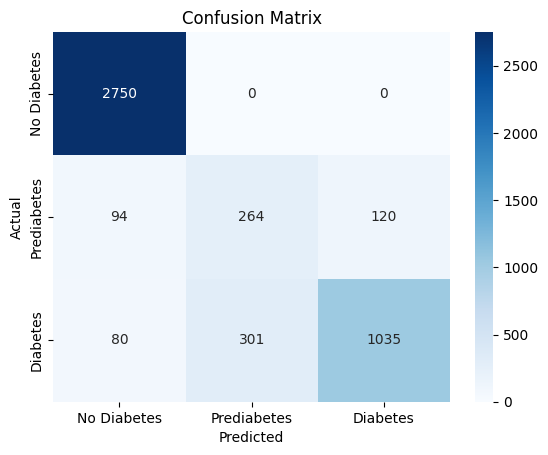

In [70]:
sns.heatmap(confusion_matrix(y_test, y_pred), xticklabels=['No Diabetes', "Prediabetes", 'Diabetes'],
            yticklabels=['No Diabetes', "Prediabetes", 'Diabetes'],
            annot=True, fmt='d', cmap='Blues'
            )
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 2.3 ENN

In [71]:
X_train_resample, y_train_resample = samples[5].drop('Class', axis=1), samples[5]['Class']
y_train_resample.value_counts().sort_index()

Class
0.0    9358
1.0    1916
2.0    3117
Name: count, dtype: int64

In [72]:
rf = RandomForestClassifier(
        n_estimators=100,
        criterion='entropy',
        class_weight='balanced',
        max_depth=10,
        min_samples_leaf=3,
        random_state=42,
        max_features=11
    )
rf.fit(X_train_resample, y_train_resample)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, max_features=11, min_samples_leaf=3,
                       random_state=42)

In [73]:
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)

In [74]:
precision_score(y_test, y_pred, average = None)

array([0.9509354 , 0.4141791 , 0.93147964])

In [75]:
recall_score(y_test, y_pred, average = None)

array([0.97963636, 0.69665272, 0.66242938])

In [76]:
f1_score(y_test, y_pred, average = None)

array([0.96507254, 0.51950078, 0.7742468 ])

In [77]:
roc_auc_score(y_test, y_prob, multi_class='ovr', average=None)

array([0.98235356, 0.87547957, 0.95740375])

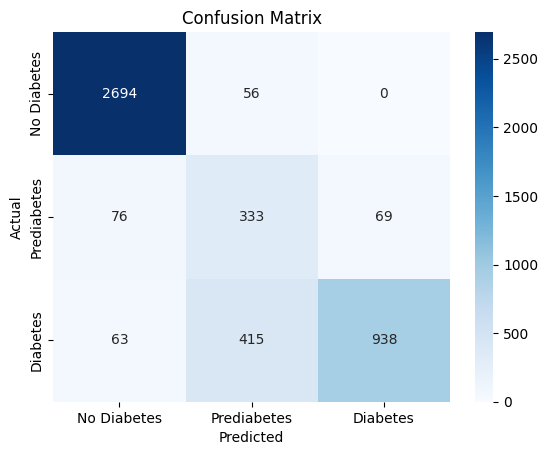

In [78]:
sns.heatmap(confusion_matrix(y_test, y_pred), xticklabels=['No Diabetes', "Prediabetes", 'Diabetes'],
            yticklabels=['No Diabetes', "Prediabetes", 'Diabetes'],
            annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 2.4 SMOTE-ENN

In [79]:
X_train_resample, y_train_resample = samples[-2].drop('Class', axis=1), samples[-2]['Class']
y_train_resample.value_counts().sort_index()

Class
0.0    9094
1.0    7842
2.0    8361
Name: count, dtype: int64

In [80]:
rf = RandomForestClassifier(
        n_estimators=100,
        criterion='entropy',
        class_weight='balanced',
        max_depth=10,
        min_samples_leaf=3,
        random_state=42,
        max_features=17
    )
rf.fit(X_train_resample, y_train_resample)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, max_features=17, min_samples_leaf=3,
                       random_state=42)

In [81]:
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)

In [82]:
precision_score(y_test, y_pred, average = None)

array([0.94045175, 0.4906367 , 0.8973064 ])

In [83]:
recall_score(y_test, y_pred, average = None)

array([0.99927273, 0.54811715, 0.75282486])

In [84]:
f1_score(y_test, y_pred, average = None)

array([0.96897038, 0.51778656, 0.8187404 ])

In [85]:
roc_auc_score(y_test, y_prob, multi_class='ovr', average=None)

array([0.98080465, 0.87043475, 0.96423672])

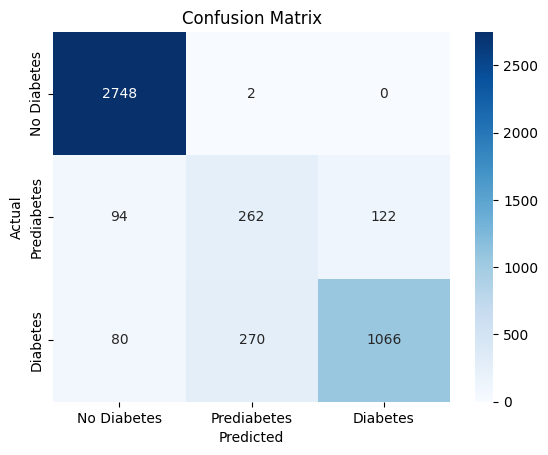

In [86]:
sns.heatmap(confusion_matrix(y_test, y_pred), xticklabels=['No Diabetes', "Prediabetes", 'Diabetes'],
            yticklabels=['No Diabetes', "Prediabetes", 'Diabetes'],
            annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 4. KẾT QUẢ

In [87]:
def sort(data):
    for i in range(len(data)-1):
        for j in range(i+1, len(data)):
            if data[i] < data[j]:
                data[i], data[j] = data[j], data[i]
    return data

In [88]:
samples_ = samples.copy()
samples_.insert(0, origin)
samples_.insert(1, test)
names_ = names.copy()
names_.insert(0, 'Origin')
names_.insert(1, 'Test')
result1 = []
for i in range(len(samples_)):
    d = samples_[i].value_counts('Class').sort_index().to_list()
    temp = d.copy()
    d_reorder = sort(d)
    m = sum(d_reorder)/3
    n = m/10
    major = [i for i in d_reorder if i >= m+n]
    minor = [i for i in d_reorder if i <= m-n]
    if np.sum(major) == 0 or d_reorder[0]-d_reorder[-1] < 1000:
        major = d_reorder[:2]
        minor = d_reorder[-2:]
    IR = np.round(np.sum(major)/np.sum(minor),2)
    result1.append(temp)
    result1[-1].append(IR)
    result1[-1].insert(0, names_[i])
result1 = pd.DataFrame(result1, columns=['Method', 'No Diabetes','Prediabetes', 'Diabetes', 'IR'])
result1.index = result1.Method
result1.drop('Method', axis = 1, inplace = True)
path = os.path.join(project_url, 'Result/d6/DataCounts.csv')
result1.to_csv(path)
result1

,No Diabetes,Prediabetes,Diabetes,IR
Method,,,,
Origin,11116,1916,5543,1.49
Test,2750,478,1416,5.75
SMOTE,11116,11116,11116,1.00
SMOTENC,11116,11116,11116,1.00
ADASYN,11116,10743,10618,1.02
NearMiss,1916,1916,1916,1.00
TomekLinks,10919,1916,5021,1.57
ENN,9358,1916,3117,1.86
SMOTEENN,9094,7842,8361,1.08


In [89]:
result2 = result1[(result1.index == 'Origin') | (result1.index == 'Test')]
result2.index = ['Train', 'Test']
path = os.path.join(project_url, 'Result/d6/TrainTestCounts.csv')
result2.to_csv(path)
result2

,No Diabetes,Prediabetes,Diabetes,IR
Train,11116,1916,5543,1.49
Test,2750,478,1416,5.75
